<a href="https://colab.research.google.com/github/h0w4rds/brief-analysis/blob/main/Presenting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Experimental Findings**

**Dataset**: netflix_password.csv

**Intent**: Analyze two different versions from Netflix' A/B testing. Communicate findings in natural language.

[Here is a style guide as well](https://https://bookdown.org/yihui/rmarkdown/html-document.html#appearance-and-style).

# **Analysis**

[Netflix is always running expeirments](https://https://youtu.be/WRGW6xHLy3k).  In March of 2020 they experimented with two versions of their landing page.   Version A (the version they were using at the time) required the user to enter only an email address in order to browse titles, explore the site.  Version B adds three changes. 

1. Additional password field; dynamic sign-in or sign-up user interaction which verifies that an associated account exists as such that user inputs for their username or email. This is a duplicated entry field.

2. Addition of an extra checkbox which acts as an opt out to signing up for email notifications and newsletters, duplicated from a deeper screen on the signup funnel.

3. Pushed down the primary call to action button onto a new line.

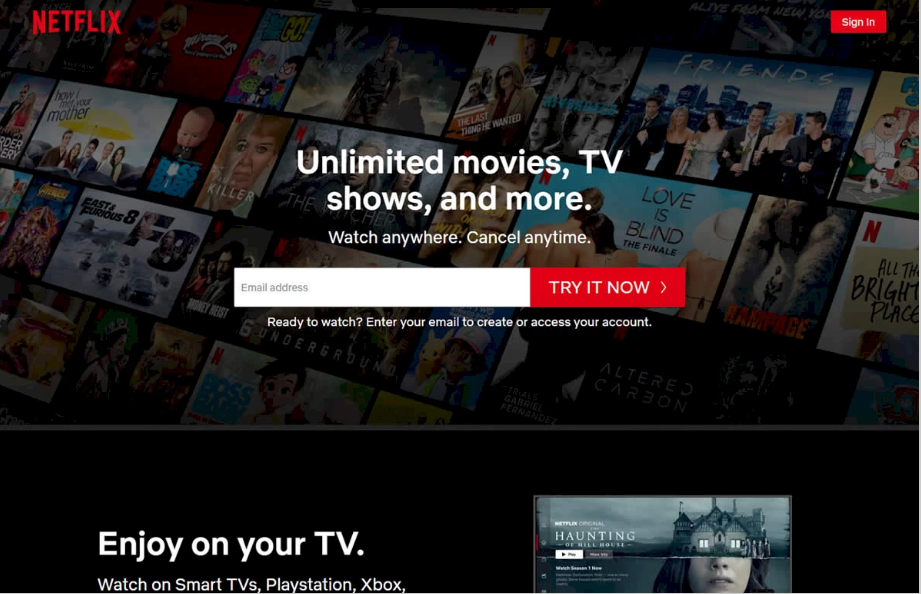

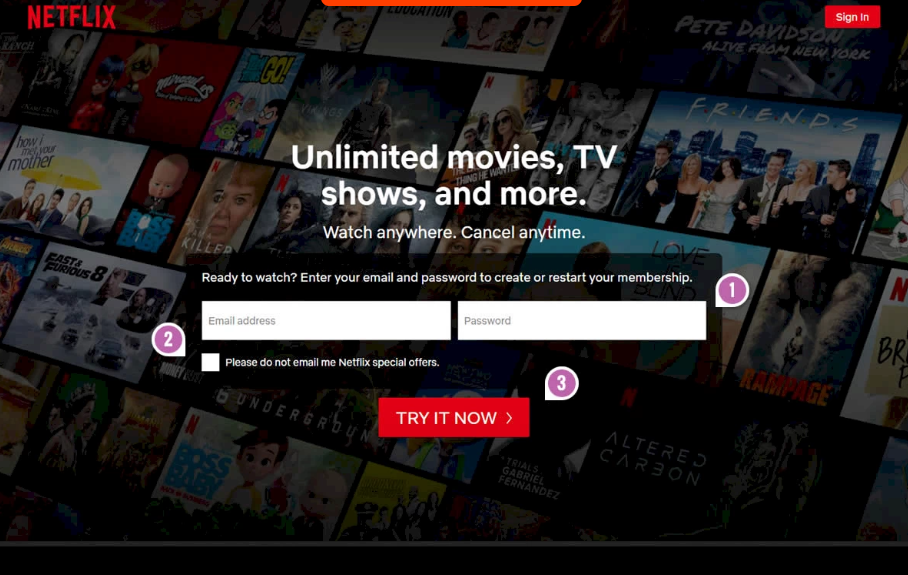

The data for this test is contained in the file "netflix_password.csv". Measured is whether someone clicked "Try it Now" button (1) or not (0). Below, the data is summarized.

In [ ]:
df <- read.csv("sample_data/netflix_password.csv")
head(df)
df$sign_ups<-as.factor(df$sign_ups)
df$version<-as.factor(df$version)
df$visit<-as.factor(df$visit)

,sign_ups,version,visit
,<int>,<chr>,<dbl>
1,0,A,56849
2,0,A,35065
3,0,A,11012
4,0,A,34475
5,1,A,58276
6,0,A,11649


In [ ]:
library(tidyverse)
df %>% group_by(version, sign_ups) %>% summarise(n=n()) %>%
  mutate(freq = n / sum(n))

`summarise()` has grouped output by 'version'. You can override using the
`.groups` argument.


version,sign_ups,n,freq
<fct>,<fct>,<int>,<dbl>
A,0,42702,0.94893333
A,1,2298,0.05106667
B,0,42598,0.95084821
B,1,2202,0.04915179


In [ ]:
summary(df)

 sign_ups  version       visit      
 0:85300   A:45000   63086  :    7  
 1: 4500   B:44800   83022  :    7  
                     85597  :    7  
                     92279  :    7  
                     96     :    6  
                     1987   :    6  
                     (Other):89760  

A corrected test of proportions utilizes the summarization to give our confidence interval. The difference is not significant.

In [ ]:
prop.test(x=c(2298,2202), n=c(45000, 44800))


	2-sample test for equality of proportions with continuity correction

data:  c(2298, 2202) out of c(45000, 44800)
X-squared = 1.6894, df = 1, p-value = 0.1937
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.0009611922  0.0047909542
sample estimates:
    prop 1     prop 2 
0.05106667 0.04915179 


The beta-binomial model will shape parameter a=number successes+1 and b=number of failures+1 and we have to do that for each version, A and B.

In [ ]:
iter=100000
a=2298+1  # count of zeros, version A
b=42702+1 # count of zeros, version B
a1=2202+1
b1=42791+1
count<-c()
for (i in 1:iter){
  A<-rbeta(1, a, b)
  B<-rbeta(1, a1, b1)
  count[i]<-ifelse(B>A, 1, 0)
}
pdiff<-sum(count)/iter
pdiff

[1] 0.07221

B will be greater 7% of the time.